In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-dark')
import seaborn as sns
import torch
import yaml
from tqdm.notebook import tqdm

# Lesion Diagnosis

## HAM10k

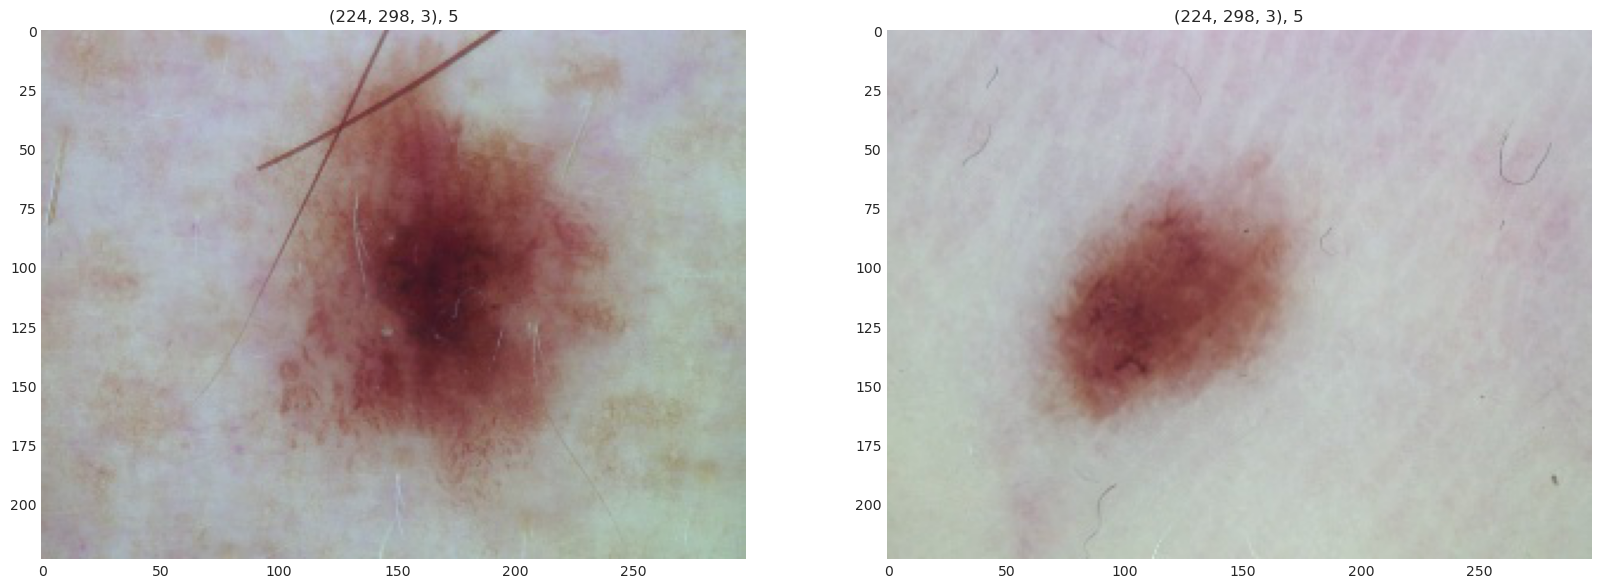

In [2]:
ham10k_df = pd.read_csv('../data/HAM10k/train_df.csv')
ham10k_dir = '../data/HAM10k/preprocessed_train_images/'

img1 = plt.imread(os.path.join(ham10k_dir, os.listdir(ham10k_dir)[0]))
img1_label = ham10k_df.loc[ham10k_df["image"] == os.listdir(ham10k_dir)[0].split('.')[0], "label"].values[0]
img2 = plt.imread(os.path.join(ham10k_dir, os.listdir(ham10k_dir)[100]))
img2_label = ham10k_df.loc[ham10k_df["image"] == os.listdir(ham10k_dir)[100].split('.')[0], "label"].values[0]

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img1)
ax[0].set_title(f"{img1.shape}, {img1_label}")
ax[1].imshow(img2)
ax[1].set_title(f"{img2.shape}, {img2_label}")

plt.show()

In [25]:
ham10k_df.sort_values('label', inplace=True)
# label_dict = {0:'Actinic Keratosis',
#              1:'Basal Cell Carcinoma',
#              2:'Benign Keratosis',
#              3:'Dermatofibroma',
#              4:'Melanoma',
#              5:'Neuvs',
#              6:'Vascular Lesion'}
label_dict = {0:'AKIEC',
             1:'BCC',
             2:'BKL',
             3:'DF',
             4:'MEL',
             5:'NV',
             6:'VASC'}
ham10k_df['Diagnosis'] = ham10k_df['label'].map(label_dict)
ham10k_df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,label,Diagnosis
2344,ISIC_0026650,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,AKIEC
2013,ISIC_0026319,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,AKIEC
2021,ISIC_0026327,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,AKIEC
6521,ISIC_0030827,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,AKIEC
872,ISIC_0025178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,AKIEC


/data/coml-oxmedis/sann7666/pytorch-lightning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/coml-oxmedis/sann7666/pytorch-lightning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/coml-oxmedis/sann7666/pytorch-lightning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


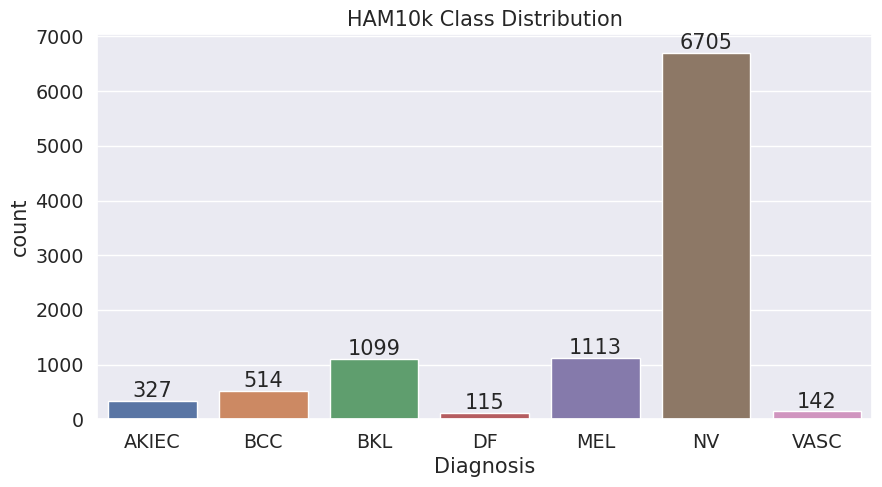

In [28]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.25)
ax = sns.countplot(x='Diagnosis', data=ham10k_df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('HAM10k Class Distribution')
plt.show()

## ISIC 2019

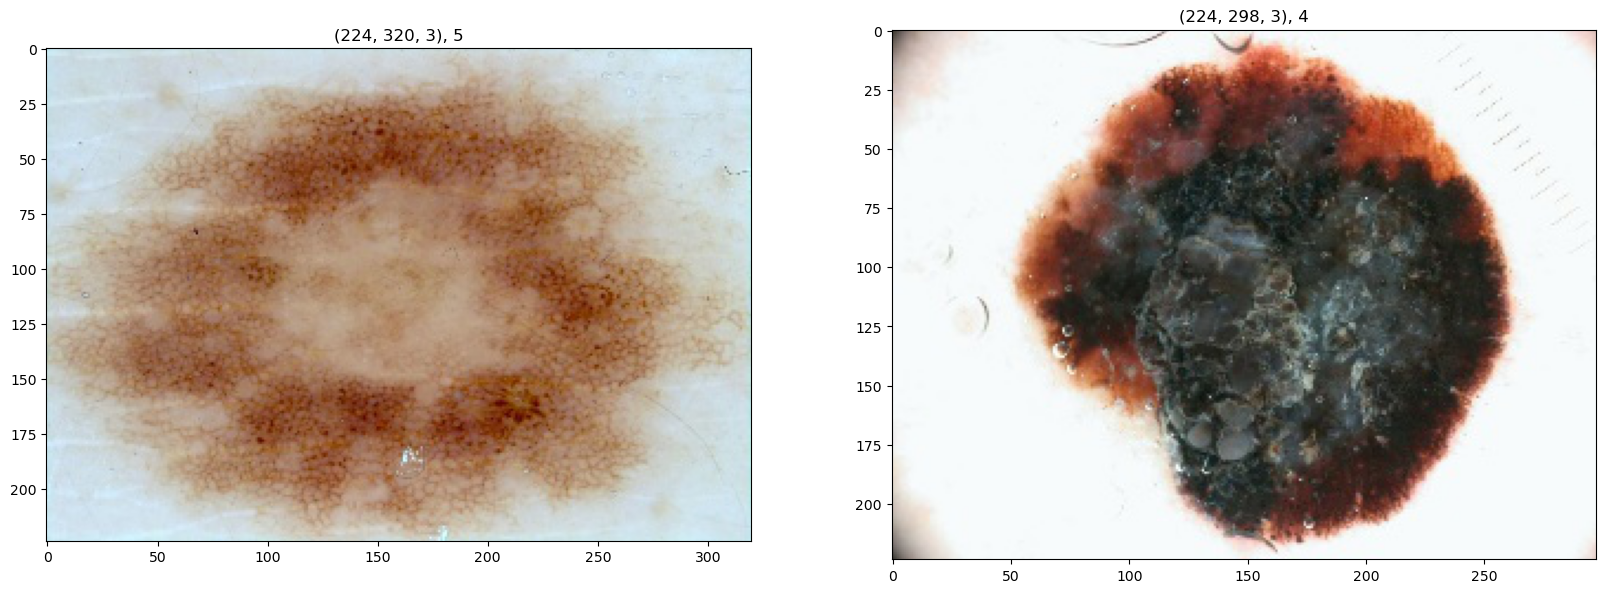

In [3]:
isic_df = pd.read_csv('../data/ISIC_2019/labels.csv')
isic_dir = '../data/ISIC_2019/preprocessed_images'

img1 = plt.imread(os.path.join(isic_dir, os.listdir(isic_dir)[0]))
img1_label = isic_df.loc[isic_df["image"] == os.listdir(isic_dir)[0].split('.')[0], "label"].values[0]
img2 = plt.imread(os.path.join(isic_dir, os.listdir(isic_dir)[100]))
img2_label = isic_df.loc[isic_df["image"] == os.listdir(isic_dir)[100].split('.')[0], "label"].values[0]

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img1)
ax[0].set_title(f"{img1.shape}, {img1_label}")
ax[1].imshow(img2)
ax[1].set_title(f"{img2.shape}, {img2_label}")

plt.show()

## PAD-UFES-20

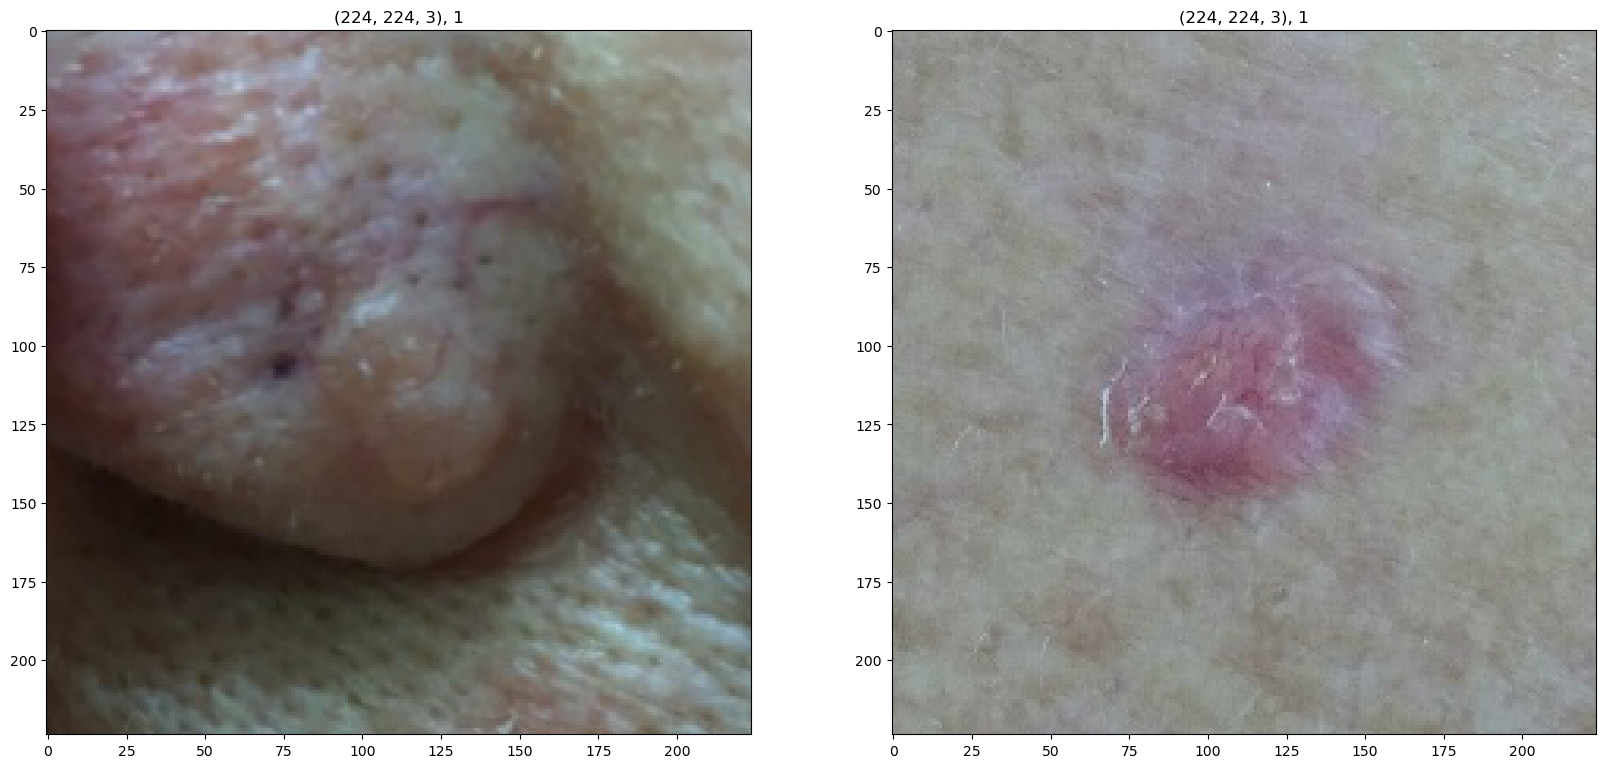

In [4]:
pad_df = pd.read_csv('../data/PAD-UFES-20/labels.csv')
pad_dir = '../data/PAD-UFES-20/preprocessed_images/'

img1 = plt.imread(os.path.join(pad_dir, os.listdir(pad_dir)[2]))
img1_label = pad_df.loc[pad_df["img_id"] == os.listdir(pad_dir)[2].split('.')[0]+'.png', "label"].values[0]
img2 = plt.imread(os.path.join(pad_dir, os.listdir(pad_dir)[3]))
img2_label = pad_df.loc[pad_df["img_id"] == os.listdir(pad_dir)[3].split('.')[0]+'.png', "label"].values[0]

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img1)
ax[0].set_title(f"{img1.shape}, {img1_label}")
ax[1].imshow(img2)
ax[1].set_title(f"{img2.shape}, {img2_label}")

plt.show()